ResNet 152

In [1]:
#Imports
import torch.nn as nn
import torchvision
from torchvision import models
import matplotlib.pyplot as plt
import torch.optim as optim
from torch.optim import lr_scheduler
import warnings
warnings.filterwarnings("ignore")

Class Counter: 7
Class Names: ['CAT', 'COW', 'DEER', 'FOX', 'HORSE', 'SQUIRREL', 'WOLF']
Device: cuda


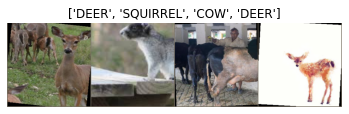

In [2]:
from ipynb.fs.full.main import train_model, test_model, CLASS_COUNTER, device, visualize_model, losses, accuracy_Scores, f1_Scores, precision_Scores, recall_Scores

In [3]:
LEARNING_RATE = 0.001
NUM_EPOCHS = 100

In [4]:
resnet152 = models.resnet152(pretrained=True)
num_ftrs = resnet152.fc.in_features

resnet152.fc = nn.Linear(num_ftrs, CLASS_COUNTER)
resnet152 = resnet152.to(device)
criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer = optim.SGD(resnet152.parameters(), lr=LEARNING_RATE)

step_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

Epoch 0/99
----------
[TRAIN] Loss: 1.5001 Acc: 0.4675 F1-Score: 0.1067 Precision: 0.1679 Recall: 0.1173
[VALID] Loss: 0.6961 Acc: 0.8345 F1-Score: 0.2020 Precision: 0.2307 Recall: 0.2086

Epoch 1/99
----------
[TRAIN] Loss: 0.9801 Acc: 0.7170 F1-Score: 0.1821 Precision: 0.2332 Recall: 0.1795
[VALID] Loss: 0.2588 Acc: 0.9472 F1-Score: 0.2367 Precision: 0.2472 Recall: 0.2368

Epoch 2/99
----------
[TRAIN] Loss: 0.6958 Acc: 0.8111 F1-Score: 0.2085 Precision: 0.2448 Recall: 0.2028
[VALID] Loss: 0.1458 Acc: 0.9718 F1-Score: 0.2430 Precision: 0.2479 Recall: 0.2430

Epoch 3/99
----------
[TRAIN] Loss: 0.5921 Acc: 0.8436 F1-Score: 0.2174 Precision: 0.2461 Recall: 0.2113
[VALID] Loss: 0.1091 Acc: 0.9665 F1-Score: 0.2420 Precision: 0.2485 Recall: 0.2416

Epoch 4/99
----------
[TRAIN] Loss: 0.5448 Acc: 0.8392 F1-Score: 0.2164 Precision: 0.2465 Recall: 0.2100
[VALID] Loss: 0.0828 Acc: 0.9762 F1-Score: 0.2444 Precision: 0.2490 Recall: 0.2441

Epoch 5/99
----------
[TRAIN] Loss: 0.4694 Acc: 0.8673 

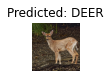

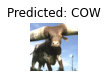

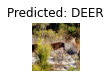

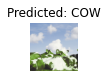

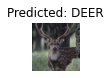

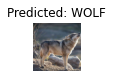

In [5]:
base_model = train_model(resnet152,"resnet", criterion, optimizer, step_lr_scheduler, num_epochs=NUM_EPOCHS)
visualize_model(base_model)
plt.show()

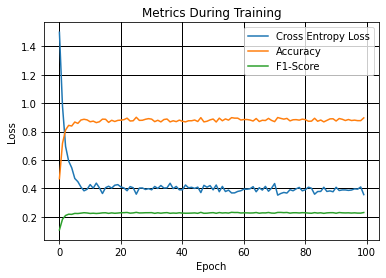

In [6]:
#Plotten
plt.plot(losses, label = "Cross Entropy Loss")
plt.plot(accuracy_Scores, label = "Accuracy")
plt.plot(f1_Scores, label="F1-Score")
plt.grid(color='k', linestyle='-', linewidth=1)
plt.xlabel('Epoch')
plt.ylabel("Loss")
plt.legend()
plt.title('Metrics During Training');

In [7]:
base_model = test_model(base_model, criterion)

[TEST] Loss: 0.0253 Acc: 0.9926 F1-Score: 0.2489 Precision: 0.2501 Recall: 0.2491
Test complete in 0m 12s
